Student name: Ghufran Ullah <br>
Student number 2411327 <br>
Februaury, 05, 2025  <br>

# Exercise 1 | TKO_7092 Evaluation of Machine Learning Methods 2025

##### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b>

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html   
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it. Please, add your full name to the file name.
    - The exercise will be graded by a maximum of 2 points.
    - Submit to moodle your solution on ** Wednesday 5 of February ** at the latest.
  
<b>Please be aware that you are required to submit your individual solution.<br> 
Submissions with identical or similar code will result in a failure for the exercise.</b>

## Import libraries

In [67]:
import pandas as pd
from scipy.stats import kendalltau
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import somersd

## Read and visualize the dataset

<p> <b>Note:</b> This dataset differs slightly from the one used in the video lectures. <br>
<b>In this dataset, some mixtures have 3 replicas, while others have 4 replicas. </b> </p> 

In the following cell: 
- Read the file water_data.csv
- Print the dimesions of the dataset (i.e. number of rows and columns) and display the first 5 rows.
- Identify the inputs and the outputs columns.
- Provide the number of mixtures with 3 replicas and 4 replicas, respectively.

In [68]:
# Here we are reading the dataset
file_path = 'water_data.csv'
df = pd.read_csv(file_path)

In [54]:
df

,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0.0,0.0,0.0,-0.999216,-0.714208,-0.414911
1,0.0,0.0,0.0,-0.990800,-0.714373,-0.238335
2,0.0,0.0,0.0,-0.990539,-0.714125,0.020788
3,14.0,0.0,14.0,-1.001247,-0.713546,0.945465
4,14.0,0.0,14.0,-1.013727,-0.714125,0.569631
...,...,...,...,...,...,...
220,5000.0,4000.0,1000.0,-0.874613,-0.584157,-1.515186
221,5000.0,4000.0,1000.0,-0.875954,-0.604495,-1.516845
222,5000.0,5000.0,0.0,-0.872241,-0.349768,0.499810
223,5000.0,5000.0,0.0,-0.872021,-0.354729,0.777301


In [55]:
df.head()

,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0.0,0.0,0.0,-0.999216,-0.714208,-0.414911
1,0.0,0.0,0.0,-0.990800,-0.714373,-0.238335
2,0.0,0.0,0.0,-0.990539,-0.714125,0.020788
3,14.0,0.0,14.0,-1.001247,-0.713546,0.945465
4,14.0,0.0,14.0,-1.013727,-0.714125,0.569631


In [69]:
# Print dataset dimensions and first 5 rows
print(f"Dataset Dimensions: {df.shape}")
df.head()

Dataset Dimensions: (225, 6)


,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0.0,0.0,0.0,-0.999216,-0.714208,-0.414911
1,0.0,0.0,0.0,-0.990800,-0.714373,-0.238335
2,0.0,0.0,0.0,-0.990539,-0.714125,0.020788
3,14.0,0.0,14.0,-1.001247,-0.713546,0.945465
4,14.0,0.0,14.0,-1.013727,-0.714125,0.569631


In [71]:
# Identifying unique mixtures based on the first three columns (output columns)
grouped = df.groupby(['c_total', 'Cd', 'Pb'])

# Counting the number of replicas for each unique mixture
replica_counts = grouped.size().reset_index(name='Replica_Count')

# Merging back with the original dataset to retain the replica count information
df = df.merge(replica_counts, on=['c_total', 'Cd', 'Pb'], how='left')

# Print number of mixtures with 3 and 4 replicas
num_3_replicas = (df['Replica_Count'] == 3).sum()
num_4_replicas = (df['Replica_Count'] == 4).sum()
print(f"Number of mixtures with 3 replicas: {num_3_replicas}")
print(f"Number of mixtures with 4 replicas: {num_4_replicas}")

Number of mixtures with 3 replicas: 129
Number of mixtures with 4 replicas: 96


In [58]:
# Define input and output variables
X = df[['Mod1', 'Mod2', 'Mod3']].values
y = df[['c_total', 'Cd', 'Pb']].values

## C-index code 

In [59]:
# In this cell is the fuction that computes the c-index value based on Somers'D statistic.
# Use this fuction as the evaluation metric in the Leave-One-Out (LOOCV) and Leave-Replicas-Out (LROCV) cross-validation methods.

def cindex(true, pred):
    s_d = somersd(true, y=pred, alternative='two-sided')
    c_index = (s_d.statistic + 1.0)/2.0
    return c_index

## Functions

In [60]:
# In this cell add the functions that you need for the data analysis part.

## Results for Leave-One-Out cross-validation

In [61]:
# Here run your script for Leave-One-Out cross-validation and print the corresponding results.

In [62]:
# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Evaluate C-index for different k values
k_values = [1, 3, 5, 7]
c_index_results = []

for k in k_values:
    # Initialize lists to store true and predicted values for each output
    y_true_all = [[] for _ in range(3)]
    y_pred_all = [[] for _ in range(3)]
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Nearest Neighbors Regression model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Store true and predicted values for each output
        for i in range(3):
            y_true_all[i].append(y_test[:, i][0])  # Ensure scalar values
            y_pred_all[i].append(y_pred[:, i][0])
    
    # Compute C-index for each output variable
    c_indices = [cindex(y_true_all[i], y_pred_all[i]) for i in range(3)]
    c_index_results.append([k] + c_indices)

# Convert results to a DataFrame and display
c_index_df = pd.DataFrame(c_index_results, columns=['k', 'C-index c_total', 'C-index Cd', 'C-index Pb'])
print(c_index_df)


   k  C-index c_total  C-index Cd  C-index Pb
0  1         0.908283    0.921869    0.880549
1  3         0.914191    0.899591    0.874452
2  5         0.894101    0.861966    0.854261
3  7         0.873729    0.814152    0.835533


## Results for Leave-Replicas-Out cross-validation

In [63]:
# Here run your script for Leave-Replicas-Out cross-validation and print the corresponding results.

In [64]:
c_index_results_lro = []

for k in k_values:
    y_true_all = [[] for _ in range(3)]
    y_pred_all = [[] for _ in range(3)]
    
    for mixture, group in df.groupby(['c_total', 'Cd', 'Pb']):
        if len(group) > 1:  # Ensure there are replicas
            test = group  # Use all replicas as test data
            train = df.drop(test.index)  # Exclude all replicas from training
            
            X_train, y_train = train[['Mod1', 'Mod2', 'Mod3']], train[['c_total', 'Cd', 'Pb']]
            X_test, y_test = test[['Mod1', 'Mod2', 'Mod3']], test[['c_total', 'Cd', 'Pb']]

            model = KNeighborsRegressor(n_neighbors=min(k, len(X_train)))
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            for i in range(3):
                y_true_all[i].extend(y_test.iloc[:, i].values)
                y_pred_all[i].extend(y_pred[:, i])
    
    c_indices = [cindex(y_true_all[i], y_pred_all[i]) for i in range(3)]
    c_index_results_lro.append([k] + c_indices)

# Convert results to a DataFrame and display
c_index_df_lro = pd.DataFrame(c_index_results_lro, columns=['k', 'C-index c_total', 'C-index Cd', 'C-index Pb'])
print("Leave-Replicas-Out Cross-Validation Results:")
print(c_index_df_lro)


Leave-Replicas-Out Cross-Validation Results:
   k  C-index c_total  C-index Cd  C-index Pb
0  1         0.818413    0.778427    0.737775
1  3         0.818673    0.761452    0.768948
2  5         0.811702    0.739717    0.747839
3  7         0.816371    0.715309    0.761849


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

In [72]:
# just to verify the variables
print(c_index_df)
print(c_index_df_lro)

   k  C-index c_total  C-index Cd  C-index Pb
0  1         0.908283    0.921869    0.880549
1  3         0.914191    0.899591    0.874452
2  5         0.894101    0.861966    0.854261
3  7         0.873729    0.814152    0.835533
   k  C-index c_total  C-index Cd  C-index Pb
0  1         0.818413    0.778427    0.737775
1  3         0.818673    0.761452    0.768948
2  5         0.811702    0.739717    0.747839
3  7         0.816371    0.715309    0.761849


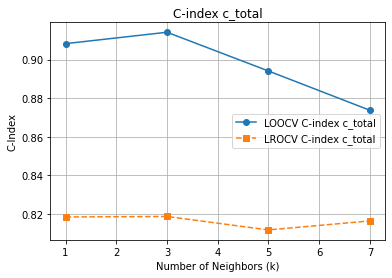

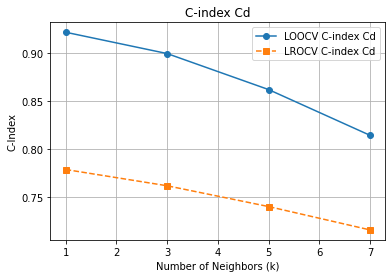

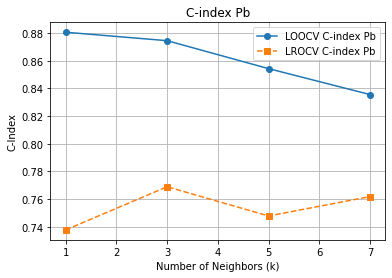

In [66]:
#plotting the graphhs between k-valus and c-index for total, Cd and Pb 
outputs = ['C-index c_total', 'C-index Cd', 'C-index Pb']
for output in outputs:
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, c_index_df[output], marker='o', linestyle='-', label=f"LOOCV {output}")
    plt.plot(k_values, c_index_df_lro[output], marker='s', linestyle='--', label=f"LROCV {output}")
    
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("C-Index")
    plt.title(f"{output}")
    plt.legend()
    plt.grid()
    plt.show()


## Interpretation of results
#### Answer the following questions based on the results obtained
1. Which cross-validation approach produced more optimistic results, and why?
2. Which cross-validation method provides a better estimate of the model's performance on unseen mixtures? Explain your answer.

#### Answers:

**Answer: 1** I think the Leave-One-Out cross-validation (LOOCV) generally produces more optimistic results compared to Leave-Replicas-Out cross-validation (LROCV). This is because LOOCV removes only one single sample at a time, which allows the model to train on almost the entire dataset, which leads to lower variability in predictions and often sometimes higher C-index values. On the other hand, LROCV removes entire sets of replicated measurements for a given mixture, which makes the test set more independent and which in turn prevents the model from relying on nearly identical training samples. This results in a more realistic evaluation of generalization performance, which often leads to lower C-index values compared to LOOCV.

**Answer: 2** I think LROCV provides a better estimate of the model’s performance on unseen mixtures compared to LeaveLOOCV. I think this is because LROCV removes all replicas of a given mixture from the training set, which ensures that the model is tested on completely unseen data. on the other hand LOOCV only removes one single instance at a time, which means that the test sample often has very similar training samples available, which leads to an overestimation of the model’s performance. I think by ensuring that the test data is truly independent of the training set, LROCV is able to give a more realistic measure of the model’s generalization ability to new mixtures.